In [22]:
# Importing the necessary modules 
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import glob
import pandas as pd
import os 
import cv2 
import numpy as np 
import tensorflow as tf  
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV, RandomizedSearchCV
import joblib

Populating the interactive namespace from numpy and matplotlib


# Reading DATA

In [16]:
dataframe = pd.read_csv("dataset/data.csv")

# Feature Engineering and Model Training

In [17]:
x = dataframe.drop(["Label"],axis=1)
y = dataframe["Label"]

**Standardization**

In [18]:
sc = StandardScaler()
X_fit = sc.fit(x)
X_std = X_fit.transform(x)

In [19]:
X_std

array([[-0.96066657, -0.5406147 , -0.33077592,  3.12189948, -0.15807181],
       [-0.95315603,  1.21978094, -0.36269702, -0.21850617, -0.15807181],
       [-0.9600205 , -0.51698341,  2.6620102 , -0.21850617, -0.15807181],
       ...,
       [-0.96381615,  1.23426756, -0.36269702, -0.21850617, -0.15807181],
       [ 1.17281149, -0.56343112, -0.36269702, -0.21850617, -0.15807181],
       [ 0.65902591, -0.56343112, -0.36269702, -0.21850617, -0.15807181]])

**Train Test Spliting**

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

**Logistic Regression Model Training**

In [24]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_predictions = lr_model.predict(x_test)

              precision    recall  f1-score   support

 Parasitized       0.90      0.90      0.90      2786
  Uninfected       0.90      0.90      0.90      2726

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512

0.89822206095791


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

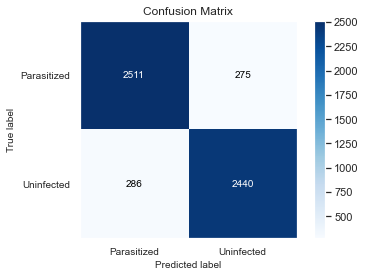

In [27]:
print(classification_report(lr_predictions,y_test))
print(lr_model.score(x_test,y_test))
skplt.metrics.plot_confusion_matrix(lr_predictions,y_test)

**KNN Model Training**

In [28]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
knn_predictions = neigh.predict(x_test)

              precision    recall  f1-score   support

 Parasitized       0.87      0.89      0.88      2723
  Uninfected       0.89      0.87      0.88      2789

    accuracy                           0.88      5512
   macro avg       0.88      0.88      0.88      5512
weighted avg       0.88      0.88      0.88      5512

0.8809869375907112


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

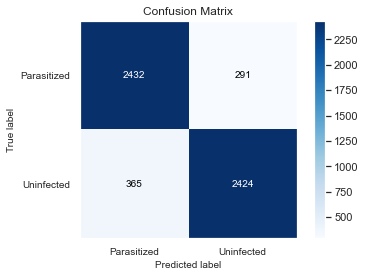

In [29]:
print(classification_report(knn_predictions,y_test))
print(neigh.score(x_test,y_test))
skplt.metrics.plot_confusion_matrix(knn_predictions,y_test)

**SVM Model Training**

In [31]:
svm_clf = svm.SVC()
svm_clf.fit(x_train,y_train)
svm_predictions = svm_clf.predict(x_test)

              precision    recall  f1-score   support

 Parasitized       0.89      0.90      0.90      2771
  Uninfected       0.90      0.89      0.90      2741

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512

0.897677793904209


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

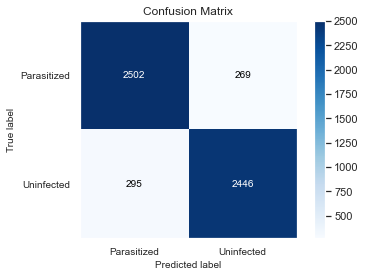

In [32]:
print(classification_report(svm_predictions,y_test))
print(svm_clf.score(x_test,y_test))
skplt.metrics.plot_confusion_matrix(svm_predictions,y_test)

**Random Forest Model Training**

In [ ]:
model = RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(x_train,y_train)
predictions = model.predict(x_test)

              precision    recall  f1-score   support

 Parasitized       0.90      0.90      0.90      2772
  Uninfected       0.90      0.89      0.90      2740

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512

0.8989477503628447


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

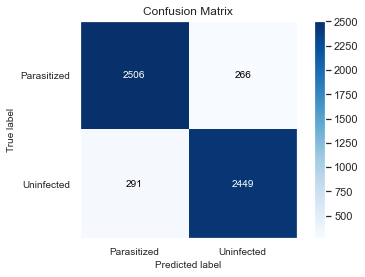

In [35]:
print(metrics.classification_report(predictions,y_test))
print(model.score(x_test,y_test))
skplt.metrics.plot_confusion_matrix(predictions,y_test)

# Hyper Parameter Tuning

* K fold Cross Validation


              precision    recall  f1-score   support

 Parasitized       0.90      0.90      0.90      2797
  Uninfected       0.89      0.90      0.90      2715

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512


Average 5-Fold CV Score: 0.901841358301845 , Standard deviation: 0.005672235055241653


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

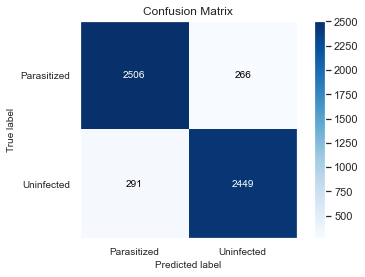

In [42]:
## 5-fold cross-validation 
rf_cv_scores =cross_val_score(model, x_train, y_train, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, predictions))
print()
print("Average 5-Fold CV Score: {}".format(np.mean(rf_cv_scores)), 
      ", Standard deviation: {}".format(np.std(rf_cv_scores)))
skplt.metrics.plot_confusion_matrix(predictions,y_test)

* Grid Search 

In [61]:
def run_the_rf_models(model, X_train, X_test, Y_tr, Y_te):
    X_train_text_df, X_test_text_df, y_train, y_test = X_train, X_test, Y_tr, Y_te
    
    if model == 'rf1':
        
        rf_params = {
            'n_estimators': [15, 24, 30],
            'criterion': ['gini'],
            'max_depth': [None, 5, 13, 21],
            'bootstrap': [True, False],
            'min_samples_split': [5, 7, 15, 25],
            'max_features': [None, 'log2', 'auto', .10, .25, .50],
            'warm_start': [True],
            'random_state': [42]}
        
        M = GridSearchCV(RandomForestClassifier(),
                        rf_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    elif model == 'rf2':
        
        rf_none_params = {
            'n_estimators': [15, 24, 30],
            'criterion': ['entropy'],
            'max_depth': [None, 5, 13, 21],
            'bootstrap': [True, False],
            'min_samples_split': [5, 7, 15, 25],
            'max_features': [None, 'log2', 'auto',  .10, .25, .50],
            'warm_start': [True],
            'random_state': [42]}
        
        M = GridSearchCV(RandomForestClassifier(),
                        rf_none_params,
                        cv = 5,
                        verbose = 1,
                        n_jobs = -1)
        
    else:
        print('There is an error.')
        
    M.fit(X_train_text_df, y_train)
    
    #save in picle file
    joblib.dump(M,"rf_malaria_detector.pkl")
     
    print(f'Train score = {M.score(X_train_text_df, y_train)}')
    print(f'Test score = {M.score(X_test_text_df, y_test)}')
    
    predictions = M.predict(X_test_text_df)
    predictions_train = M.predict(X_train_text_df)
    
    print('--------')
    print(skplt.metrics.plot_confusion_matrix(y_test, predictions))
    print(f'Best params = {M.best_params_}')
    print('----F1 Score, Recall, Precision----')
    # print precision, recall, F1-score per each class/tag
    print(classification_report(y_test, predictions))
    


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  6.7min finished


Train score = 0.9177174997732015
Test score = 0.897677793904209
--------
AxesSubplot(0.125,0.125;0.62x0.755)
Best params = {'bootstrap': True, 'criterion': 'gini', 'max_depth': 13, 'max_features': 0.1, 'min_samples_split': 7, 'n_estimators': 30, 'random_state': 42, 'warm_start': True}
----F1 Score, Recall, Precision----
              precision    recall  f1-score   support

 Parasitized       0.91      0.89      0.90      2797
  Uninfected       0.89      0.91      0.90      2715

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512



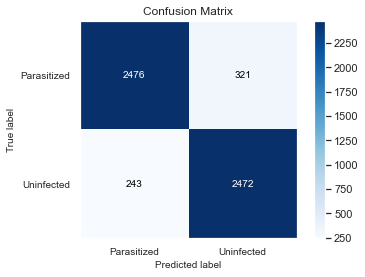

In [63]:
run_the_rf_models("rf1", x_train, x_test, y_train, y_test)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 10.1min finished


Train score = 0.909280595119296
Test score = 0.8996734397677794
--------
AxesSubplot(0.125,0.125;0.62x0.755)
Best params = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 13, 'max_features': 0.1, 'min_samples_split': 25, 'n_estimators': 30, 'random_state': 42, 'warm_start': True}
----F1 Score, Recall, Precision----
              precision    recall  f1-score   support

 Parasitized       0.91      0.89      0.90      2797
  Uninfected       0.89      0.91      0.90      2715

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512



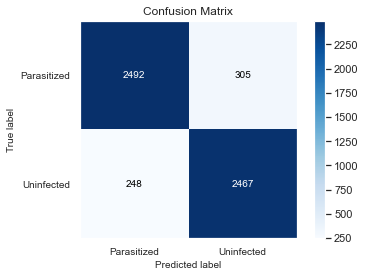

In [62]:
run_the_rf_models("rf2", x_train, x_test, y_train, y_test)

# ML Classifier Comparison

In [46]:
scores = [model.score(x_test,y_test),lr_model.score(x_test,y_test),svm_clf.score(x_test,y_test),neigh.score(x_test,y_test)]
names = ["Random Forest","Logistic Regression","SVM","KNN"]
score_comparison = pd.DataFrame({'Name': names, 'Score': scores})

In [47]:
score_comparison

,Name,Score
0,Random Forest,0.899673
1,Logistic Regression,0.898222
2,SVM,0.897678
3,KNN,0.880987


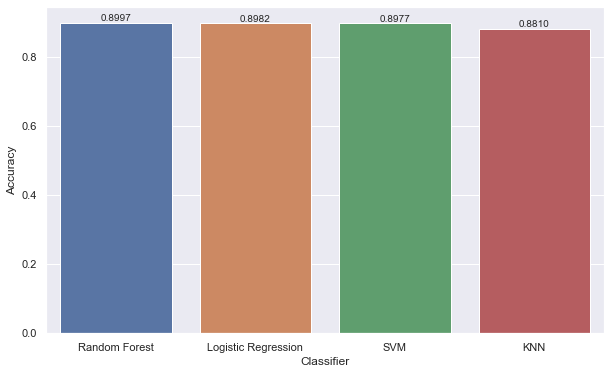

In [48]:
plt.figure(figsize=(10,6)) 
axis = sns.barplot(x = 'Name', y = 'Score', data = score_comparison)
axis.set(xlabel='Classifier', ylabel='Accuracy')
 
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.show()

**Hence We can clearly see Random Forest is the best out of all the ML models**

# Saving the Model to Disk for Deployment in the Web APP

              precision    recall  f1-score   support

 Parasitized       0.89      0.91      0.90      2740
  Uninfected       0.91      0.89      0.90      2772

    accuracy                           0.90      5512
   macro avg       0.90      0.90      0.90      5512
weighted avg       0.90      0.90      0.90      5512

0.8996734397677794


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

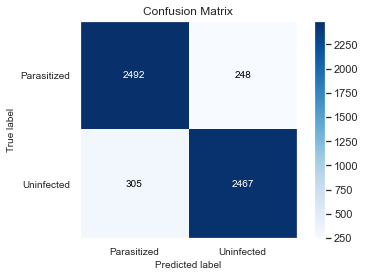

In [36]:
#saving model with best parameters after hyper parameter tunning 
#Best params = {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 13, 'max_features': 0.1, 'min_samples_split': 25, 'n_estimators': 30, 'random_state': 42, 'warm_start': True}

model = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 13, max_features= 0.1, min_samples_split= 25, n_estimators= 30, random_state= 42, warm_start= True)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(classification_report(predictions,y_test))
print(model.score(x_test,y_test))
skplt.metrics.plot_confusion_matrix(predictions,y_test)

In [38]:
#SAVING IT TO DISK FOR DEPLOYMENT PURPOSE
joblib.dump(model,"rf2_malaria_detector.pkl")

['rf2_malaria_detector.pkl']

# Web APP

* Web App is Built using Flask
* Its URL is https://malaria-detector-aidi1002.herokuapp.com/
* In order to test the application, please upload the image(C33P1thinF_IMG_20150619_121229a_cell_177.png) from the project folder of a Human cell and see the result of detection.